Em parceria com Ana Luiza Young

# Pipelines, PCA, Clustering

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 40)
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


Vamos transformar os dados de gênero:

In [2]:
for l in range(400):
    if data.loc[l,"Gender"] == "Male":
        data.loc[l,"Gender"] = 0
    else:
        data.loc[l,"Gender"] = 1

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19.0,19000.0,0
1,15810944,0,35.0,20000.0,0
2,15668575,1,26.0,43000.0,0
3,15603246,1,27.0,57000.0,0
4,15804002,0,19.0,76000.0,0
5,15728773,0,27.0,58000.0,0
6,15598044,1,27.0,84000.0,0
7,15694829,1,32.0,150000.0,1
8,15600575,0,25.0,33000.0,0
9,15727311,1,35.0,65000.0,0


Agora, vamos transformar os dados com o StandardScaler

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_dummies = data.filter(['Gender'], axis=1).values
X_numericas = data.filter(['Age', 'EstimatedSalary'], axis=1).values

scaler = StandardScaler().fit(X_numericas)
X_numericas_scaled = scaler.transform(X_numericas)

X = np.append(X_dummies, X_numericas_scaled, axis=1)
y = data['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [5]:
X_train

array([[ 1.        ,  1.84770149,  1.53453399],
       [ 1.        ,  0.12846516,  0.03692631],
       [ 0.        ,  0.89257019, -1.3138571 ],
       [ 0.        , -1.30423178, -1.49004624],
       [ 1.        , -0.15807423, -0.57973568],
       [ 1.        , -0.54012675,  2.35674998],
       [ 1.        ,  0.98808332, -1.19639767],
       [ 0.        , -0.73115301,  1.09406114],
       [ 0.        ,  2.13424088, -1.04957339],
       [ 0.        ,  0.03295203, -0.25672226],
       [ 0.        , -0.44461362, -1.13766796],
       [ 0.        ,  0.12846516,  0.03692631],
       [ 0.        ,  1.65667523, -0.9027491 ],
       [ 1.        ,  1.08359645, -0.9027491 ],
       [ 1.        ,  0.51051768,  1.24088543],
       [ 0.        , -1.01769239, -1.46068138],
       [ 1.        , -1.11320552, -1.54877595],
       [ 1.        , -0.0625611 ,  0.68295315],
       [ 0.        ,  0.41500455, -0.46227625],
       [ 0.        , -0.25358736, -0.25672226],
       [ 0.        , -0.82666613,  0.154

### PCA

Vamos explorar as preditoras para obter uma representação visual dos dados via componentes principais

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.50836762, 0.37933963, 0.11229274])

In [ ]:
pca.get_params()

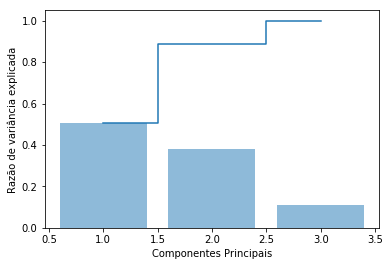

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Razão de variância explicada')
plt.xlabel('Componentes Principais')
plt.show()

Notamos que com dois componentes conseguimos explicar quase 90% da variância.

In [14]:
colors = ['r', 'b']
markers = ['s', 'x']

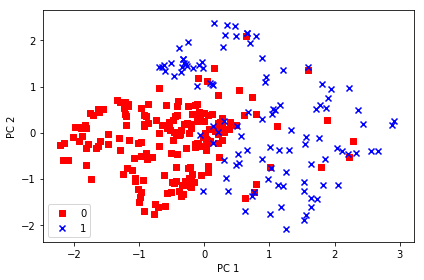

In [15]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Agora, vamos plotar a fronteira de classificação para esse conjunto de dados, com base na regressão logística:

In [16]:
pca2 = PCA(n_components = 2)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)
pca2.explained_variance_ratio_

array([0.50836762, 0.37933963])

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca2, y_train)

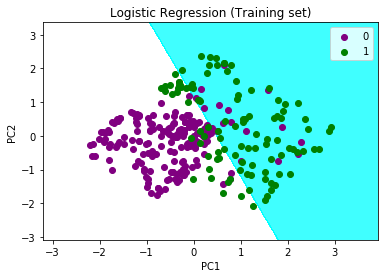

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Para complementar o PCA, vamos testar o kernelpca e verificar se há alguma melhora na separação das classes:

In [19]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [21]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

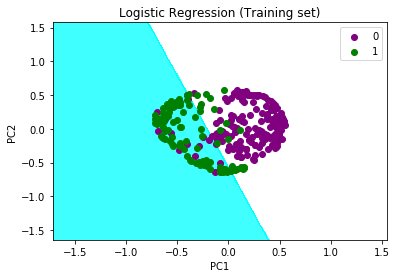

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

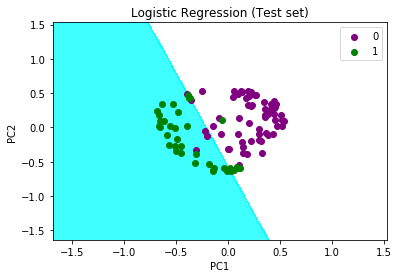

In [24]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
Podemos testar outros parâmetros para o Kernelpca:

## Clustering

### K-means Clustering

Vamos utilizar as técnicas de clustering em uma nova base de dados:

In [32]:
datum = pd.read_csv('Mall_Customers.csv')

In [33]:
datum

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [35]:
X = datum.iloc[:, [3, 4]].values
y = datum.iloc[:, 3].values

Vamos testar um método intuitivo para definir a quantidade de clusters
Note que, aqui, já iremos setar o init para 'k-means++', para resolver o problema de inicialização aleatória do Kmeans

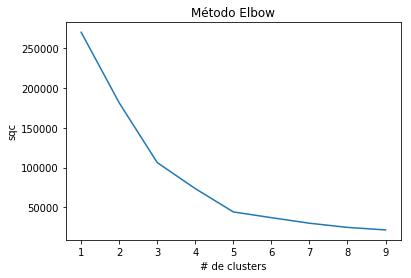

In [39]:
from sklearn.cluster import KMeans
sqc = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    sqc.append(kmeans.inertia_)
plt.plot(range(1, 10), sqc)
plt.title('Método Elbow')
plt.xlabel('# de clusters')
plt.ylabel('sqc')
plt.show()

O gráfico acima indica que a soma de quadrados em clusters começa tem uma queda menos acentuada a partir de 5 clusters.
Vamos usar k=5, então:

In [43]:
kmeans = KMeans(n_clusters=5, init = 'k-means++')
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [44]:
y_kmeans

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

Vamos plotar um gráfico para visualizar os clusters utilizando o mglearn

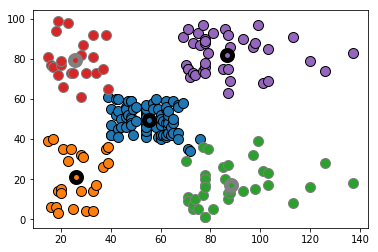

In [48]:
import mglearn
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2, 3, 4],
    markers='o', markeredgewidth=5)

Agora, vamos utilizar o método de Silhouette Coefficients para comparar a escolha do K com o método Elbow:

In [50]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

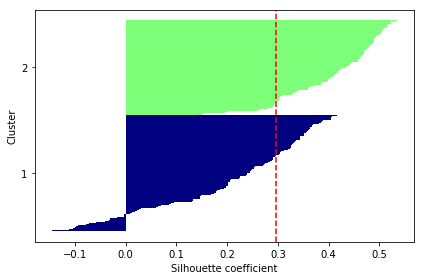

0.2968969162503008


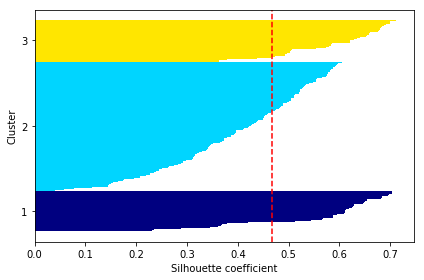

0.46761358158775435


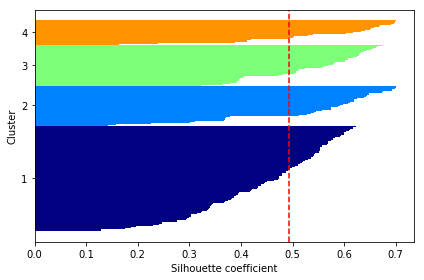

0.4931963109249047


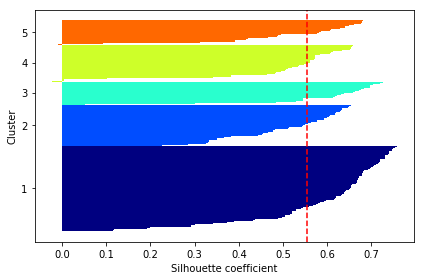

0.553931997444648


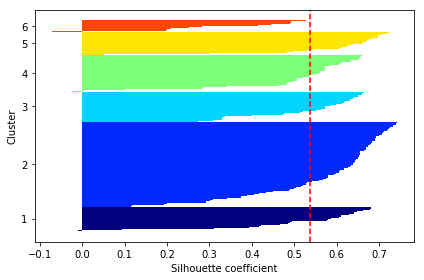

0.5379675585622219


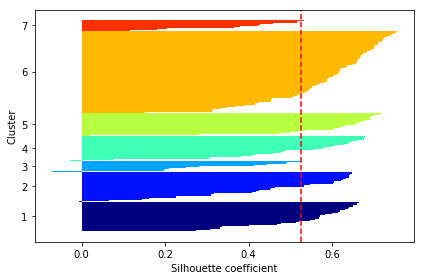

0.5264283703685728


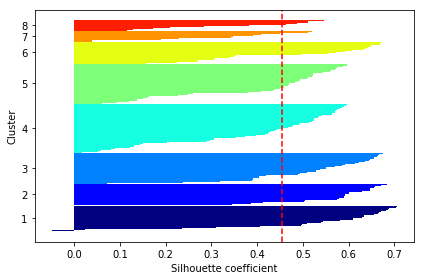

0.45407359550241166


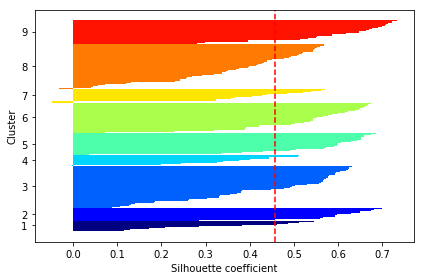

0.457462901394195


In [56]:
for k_var in range(2,10):
    km = KMeans(n_clusters=k_var)
    km.fit(X)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()
    print(silhouette_avg)

Notamos que o valor do coeficiente Silhouette é maior quando k = 5. Então, ambos os métodos indicaram o mesmo valor, neste caso.

### Clustering Hierárquico

#### Com Scipy

In [89]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(datum.iloc[:,3:4], metric='euclidean')))

In [90]:
row_dist

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,...,88.0,88.0,98.0,98.0,105.0,105.0,111.0,111.0,122.0,122.0
1,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,...,88.0,88.0,98.0,98.0,105.0,105.0,111.0,111.0,122.0,122.0
2,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,...,87.0,87.0,97.0,97.0,104.0,104.0,110.0,110.0,121.0,121.0
3,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,...,87.0,87.0,97.0,97.0,104.0,104.0,110.0,110.0,121.0,121.0
4,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,86.0,86.0,96.0,96.0,103.0,103.0,109.0,109.0,120.0,120.0
5,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,86.0,86.0,96.0,96.0,103.0,103.0,109.0,109.0,120.0,120.0
6,3.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,...,85.0,85.0,95.0,95.0,102.0,102.0,108.0,108.0,119.0,119.0
7,3.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,...,85.0,85.0,95.0,95.0,102.0,102.0,108.0,108.0,119.0,119.0
8,4.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,...,84.0,84.0,94.0,94.0,101.0,101.0,107.0,107.0,118.0,118.0
9,4.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,...,84.0,84.0,94.0,94.0,101.0,101.0,107.0,107.0,118.0,118.0


In [ ]:
help(pdist)

In [92]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(datum.iloc[:,3:4], metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['Annual Income', 'Spending Score',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,Annual Income,Spending Score,distance,no. of items in clust.
cluster 1,0.0,1.0,0.0,2.0
cluster 2,2.0,3.0,0.0,2.0
cluster 3,4.0,5.0,0.0,2.0
cluster 4,6.0,7.0,0.0,2.0
cluster 5,8.0,9.0,0.0,2.0
cluster 6,10.0,204.0,0.0,3.0
cluster 7,11.0,205.0,0.0,4.0
cluster 8,12.0,13.0,0.0,2.0
cluster 9,14.0,207.0,0.0,3.0
cluster 10,15.0,208.0,0.0,4.0


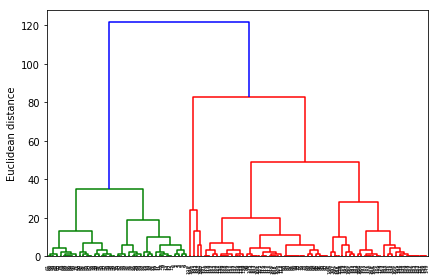

In [93]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [94]:
row_clusters = linkage(pdist(datum.iloc[:,3:4], metric='cityblock'), method='complete')
pd.DataFrame(row_clusters,
             columns=['Annual Income', 'Spending Score',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,Annual Income,Spending Score,distance,no. of items in clust.
cluster 1,0.0,1.0,0.0,2.0
cluster 2,2.0,3.0,0.0,2.0
cluster 3,4.0,5.0,0.0,2.0
cluster 4,6.0,7.0,0.0,2.0
cluster 5,8.0,9.0,0.0,2.0
cluster 6,10.0,204.0,0.0,3.0
cluster 7,11.0,205.0,0.0,4.0
cluster 8,12.0,13.0,0.0,2.0
cluster 9,14.0,207.0,0.0,3.0
cluster 10,15.0,208.0,0.0,4.0


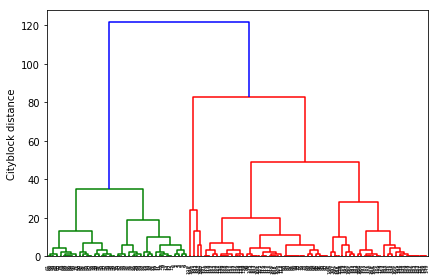

In [95]:
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Cityblock distance')
plt.show()

#### Com Sklearn

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
help(AgglomerativeClustering)

In [97]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Text(0,0.5,'Spending Score')

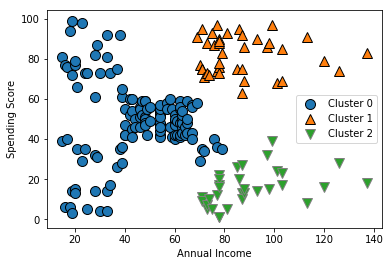

In [98]:
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

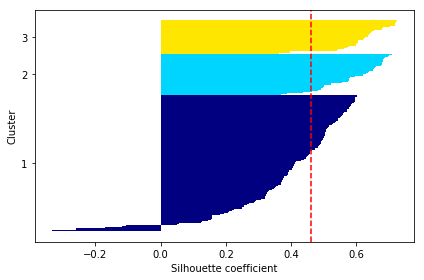

In [99]:
y_km = agg.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()